[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/riju-jec/Student-engagement/blob/main/run_MLmodels.ipynb)

# Data Scaling function

In [43]:
!pwd

/content/Student-Engagement


In [44]:
!git clone https://github.com/rijju-das/Student-Engagement.git

fatal: destination path 'Student-Engagement' already exists and is not an empty directory.


In [45]:
%cd /content/Student-Engagement

/content/Student-Engagement


In [122]:
from AU_mapping import AU_mapping

In [47]:
from ML_classification import ML_classification

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

def scalingDF(df):
  # scaler = QuantileTransformer(output_distribution='normal')
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(df)
  df_s = pd.DataFrame(scaled,index=df.index, columns=df.columns)
  return df_s

# Load and merge the datasets

In [112]:
import pandas as pd

df0 = pd.read_csv("/content/Student-engagement/WACV data/merged_data0.csv")
df1 = pd.read_csv("/content/Student-engagement/WACV data/merged_data1.csv")
df2 = pd.read_csv("/content/Student-engagement/WACV data/merged_data2.csv")

In [113]:
df00 = df0.loc[df0['confidence'] >= 0.7]
df11 = df1.loc[df1['confidence'] >= 0.7]
df22 = df2.loc[df2['confidence'] >= 0.7]

In [114]:
from sklearn.utils import resample
#Resampling for treating the class imabalnce problem
n = min(len(df00),len(df11),len(df22))
df1_ds = resample(df11, replace=True, n_samples=n, random_state=42)
df2_ds = resample(df22, replace=True, n_samples=n, random_state=42)

In [115]:
df = pd.concat([df00,df11,df22])
# df = pd.concat([df00,df1_ds,df2_ds])

In [116]:
df = df.sample(frac=1)

In [117]:
df_x = df.loc[:,"x0":"AU45_c"]

In [118]:
df_y = df.loc[:,"Label_y"]

In [119]:
df = pd.concat([scalingDF(df_x),df_y],axis=1)

In [120]:
df

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Label_y
901,0.061889,0.016317,0.073482,0.020785,0.055921,0.018735,0.057047,0.019185,0.070513,0.020833,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
66,0.048860,0.027972,0.051118,0.036952,0.039474,0.030445,0.036913,0.031175,0.048077,0.039352,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
883,0.058632,0.009324,0.073482,0.016166,0.052632,0.011710,0.057047,0.016787,0.070513,0.018519,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2
553,0.071661,0.016317,0.086262,0.018476,0.062500,0.016393,0.060403,0.016787,0.083333,0.018519,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
107,0.071661,0.009324,0.108626,0.016166,0.072368,0.014052,0.097315,0.016787,0.112179,0.018519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.068404,0.009324,0.092652,0.013857,0.062500,0.009368,0.073826,0.014388,0.092949,0.016204,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
943,0.058632,0.041958,0.079872,0.048499,0.055921,0.042155,0.063758,0.038369,0.080128,0.046296,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1062,0.061889,0.004662,0.073482,0.013857,0.055921,0.007026,0.057047,0.011990,0.073718,0.013889,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2
856,0.055375,0.013986,0.079872,0.025404,0.055921,0.018735,0.067114,0.021583,0.083333,0.027778,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2


# AU mapping with engagement labels

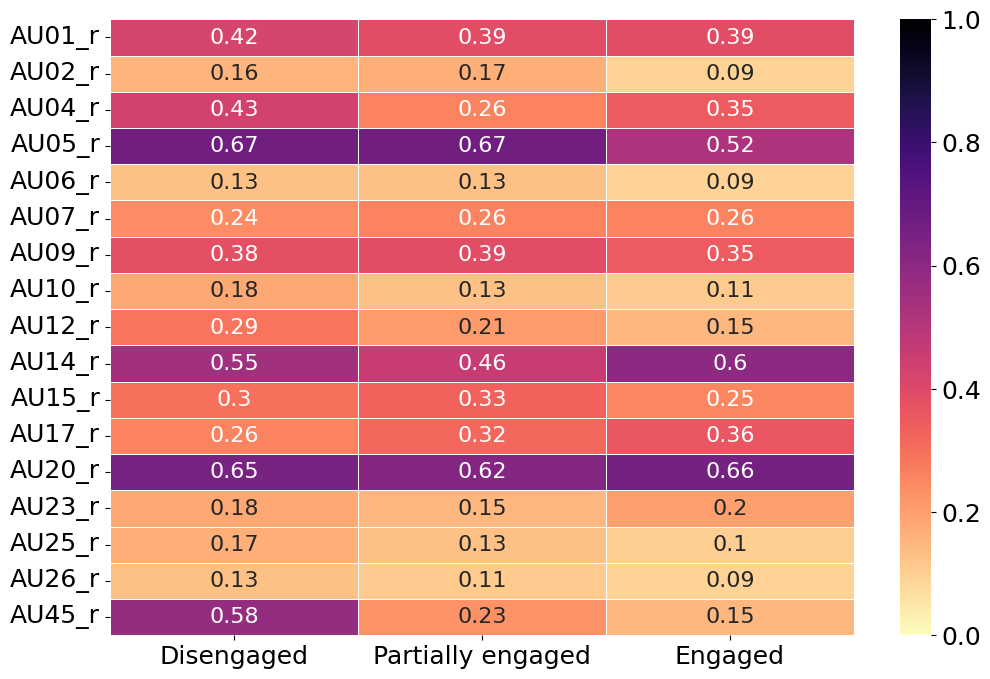

In [123]:
df_r = pd.concat([df00,df11,df22])
df_r = df_r.sample(frac=1)
df_x = df_r.loc[:,"x0":"AU45_c"]
df_y = df_r.loc[:,"Label_y"]
df_r = pd.concat([scalingDF(df_x),df_y],axis=1)


map = AU_mapping()
fig, df_map = map.au_heatmap(df)

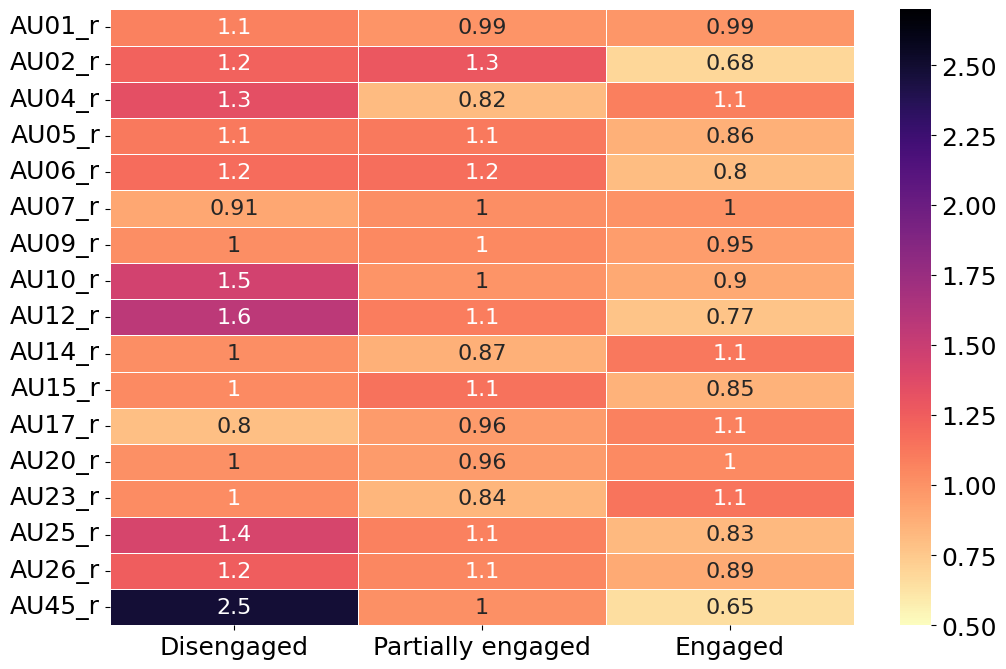

In [109]:
from AU_mapping_relative import AU_mapping
map = AU_mapping()
fig, df_map = map.au_heatmap(df_r)
fig.savefig("Relative_AU_mapping.pdf")

2196


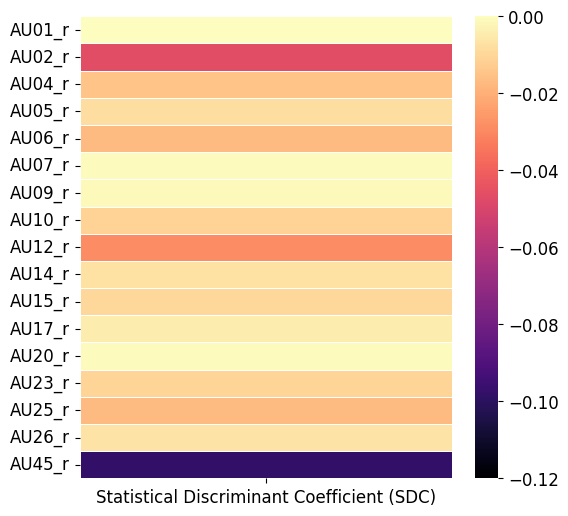

In [110]:
from AU_mapping_SDC import AU_mapping
map = AU_mapping()
fig, df_map = map.au_heatmap(df_r)
fig.savefig("SDC_Scores.pdf")

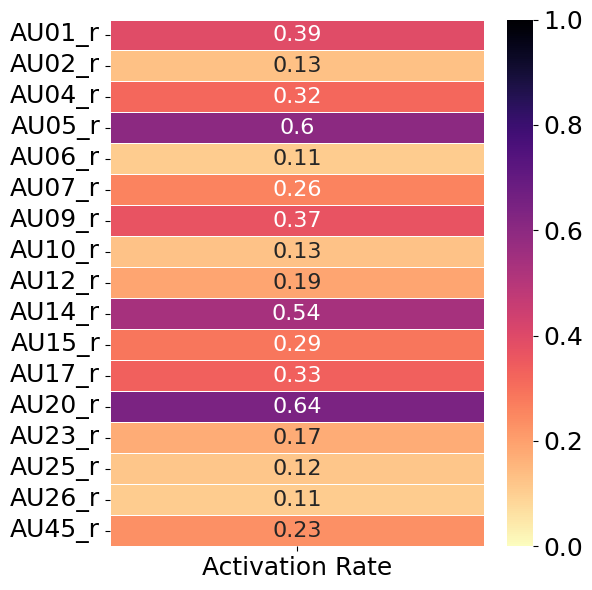

In [111]:
from AU_mapping_DAiSEE import AU_mapping
map = AU_mapping()
fig, df_map = map.au_heatmap(df_r)
fig.savefig("AU_ActivationRates_DAiSEE.pdf")

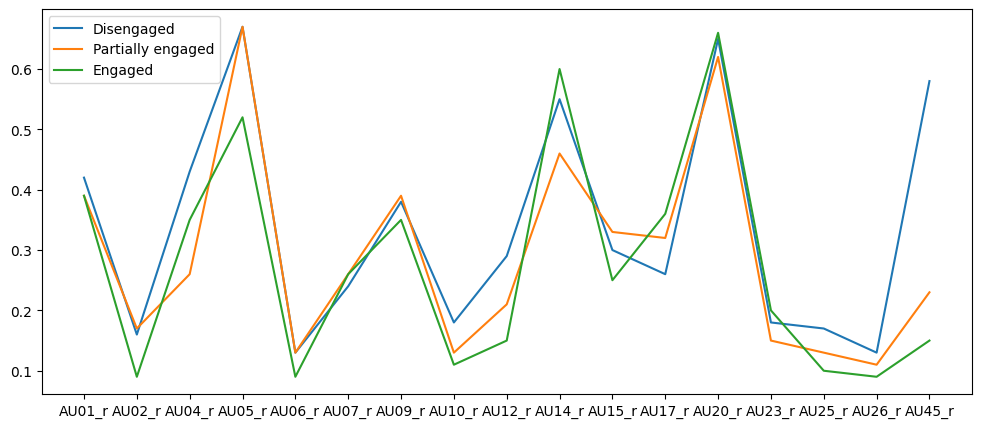

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,5))
for index, row in df_map.T.iterrows():
    plt.plot(row, label=index)
plt.legend()
plt.show()

# Classification with ML models

SET 1: Mediapipe facial landmark
SET 2: Eye Gaze and Head Pose
SET 3: AU
SET 4: All

In [86]:
obj = ML_classification()

In [87]:
training_data=obj.feature_sets(df)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


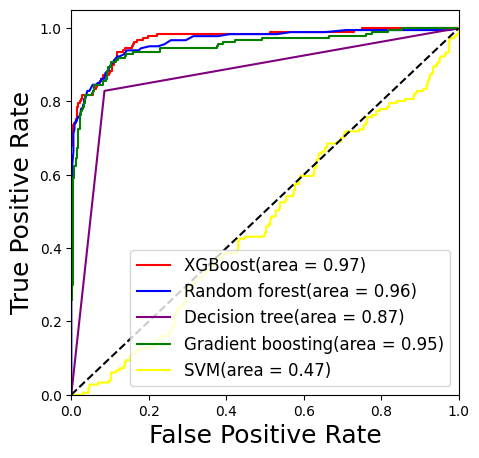

[[RandomForestClassifier(random_state=27, verbose=1), 0.856353591160221, 0.8598289571746215, 0.856353591160221, 0.856353591160221], [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...), 0.850828729281768, 0.8522242799469985, 0.850828729281768, 0.850828729281768], [DecisionTreeClassifier(max_depth=39), 0.82

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


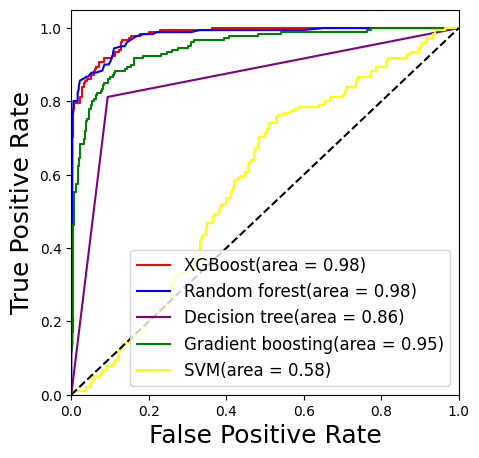

[[RandomForestClassifier(random_state=27, verbose=1), 0.8839779005524862, 0.8850753610094372, 0.8839779005524862, 0.8839779005524862], [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...), 0.8784530386740331, 0.8818624890928307, 0.8784530386740331, 0.8784530386740331], [DecisionTreeClassifier(max_depth=39)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


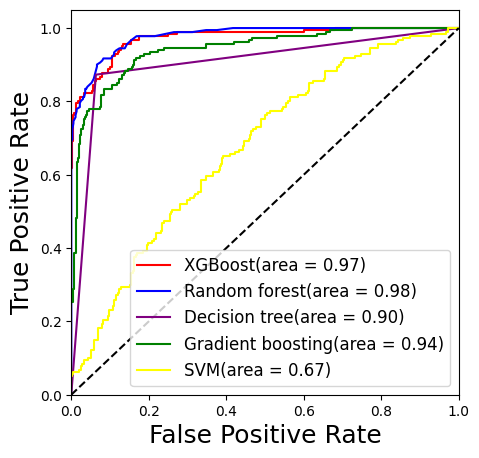

[[RandomForestClassifier(random_state=27, verbose=1), 0.8839779005524862, 0.8849636873997505, 0.8839779005524862, 0.8839779005524862], [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...), 0.861878453038674, 0.8621556862512129, 0.861878453038674, 0.861878453038674], [DecisionTreeClassifier(max_depth=39), 0

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


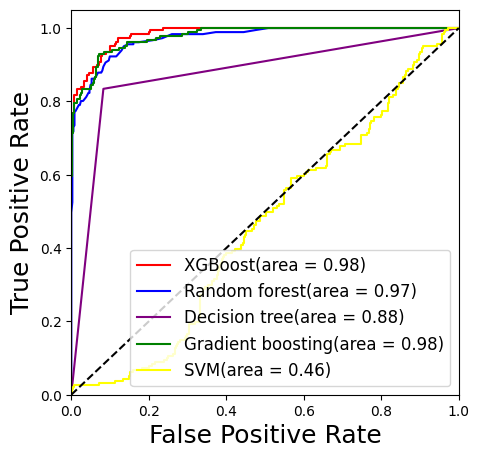

[[RandomForestClassifier(random_state=27, verbose=1), 0.8729281767955801, 0.8754228471332242, 0.8729281767955801, 0.8729281767955801], [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...), 0.8895027624309392, 0.8923751747210659, 0.8895027624309392, 0.8895027624309392], [DecisionTreeClassifier(max_depth=39)

In [88]:
dfML_result=[]
roc_plot=[]
for i in range(4):
  temp , plot= obj.classifier_result(training_data[i],i,"/content/drive/MyDrive/DAiSEE/trained_models")
  print(temp)
  dfML_result.append(pd.DataFrame(temp,columns=["model","Accuracy","Precision","Recall","F-measure"],index=["Random forest","XGBoost","Decision tree","SVM","Gradient Boosting"]).round(decimals=2))
  roc_plot.append(plot)

# ROC

In [89]:
dfML_result[0]

,model,Accuracy,Precision,Recall,F-measure
Random forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.86,0.86,0.86,0.86
XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.85,0.85,0.85,0.85
Decision tree,DecisionTreeClassifier(max_depth=39),0.83,0.83,0.83,0.83
SVM,"SVC(C=1, gamma=0.001, probability=True)",0.35,0.25,0.35,0.35
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.85,0.85,0.85,0.85


In [90]:
dfML_result[1]

,model,Accuracy,Precision,Recall,F-measure
Random forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.88,0.89,0.88,0.88
XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.88,0.88,0.88,0.88
Decision tree,DecisionTreeClassifier(max_depth=39),0.81,0.82,0.81,0.81
SVM,"SVC(C=1, gamma=0.001, probability=True)",0.34,0.11,0.34,0.34
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.86,0.86,0.86,0.86


In [91]:
dfML_result[2]

,model,Accuracy,Precision,Recall,F-measure
Random forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.88,0.88,0.88,0.88
XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.86,0.86,0.86,0.86
Decision tree,DecisionTreeClassifier(max_depth=39),0.87,0.88,0.87,0.87
SVM,"SVC(C=1, gamma=0.001, probability=True)",0.34,0.11,0.34,0.34
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.82,0.83,0.82,0.82


In [92]:
dfML_result[3]

,model,Accuracy,Precision,Recall,F-measure
Random forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.87,0.88,0.87,0.87
XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.89,0.89,0.89,0.89
Decision tree,DecisionTreeClassifier(max_depth=39),0.83,0.84,0.83,0.83
SVM,"SVC(C=1, gamma=0.001, probability=True)",0.35,0.25,0.35,0.35
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.87,0.87,0.87,0.87


In [72]:
dfML_result[3].to_csv("result_s4.csv")

In [73]:
roc_plot[3].savefig("roc_plot_s4.pdf")